In [74]:
import pandas as pd
main_df = pd.read_csv('/Users/merryxmm7/Documents/GitHub/Final_Project_Ironhack/Premier_league_predictor/clean_for_ml.csv')
main_df

,Position,HomeTeam,AwayTeam,Matchweek,Referee,result,B365H,B365D,B365A,xg,...,avg_HR,avg_AR,avg_poss,avg_sh,avg_sot,avg_dist,avg_fk,avg_pk,avg_pkatt,form
0,3,AFC Bournemouth,Cardiff City,1,K Friend,1,1.90,3.60,4.50,2.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,15,Arsenal FC,Manchester City,1,M Oliver,0,4.00,3.80,1.95,0.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,18,Fulham FC,Crystal Palace,1,M Dean,0,2.50,3.40,3.00,0.7,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,19,Huddersfield Town,Chelsea FC,1,C Kavanagh,0,6.50,4.00,1.61,0.3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,Liverpool FC,West Ham United,1,A Taylor,1,1.25,6.50,14.00,4.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,10,Crystal Palace,Aston Villa,38,D Bond,1,1.85,4.33,3.60,2.5,...,0.131579,0.289474,146.684211,42.342105,13.394737,51.789474,1.947368,0.500000,0.552632,0.466667
2276,3,Liverpool FC,Wolverhampton Wanderers,38,C Kavanagh,1,1.17,8.00,15.00,4.5,...,0.105263,0.078947,172.763158,50.105263,16.789474,50.392105,1.289474,0.447368,0.552632,0.933333
2277,18,Luton Town,Fulham FC,38,M Donohue,0,2.90,3.90,2.20,2.0,...,0.000000,0.055556,24.777778,6.444444,1.861111,8.277778,0.083333,0.027778,0.027778,0.200000
2278,1,Manchester City,West Ham United,38,J Brooks,1,1.08,12.00,21.00,1.9,...,0.131579,0.131579,175.500000,47.736842,17.184211,49.642105,1.447368,0.394737,0.500000,1.000000


In [68]:
main_df.columns

Index(['Position', 'Matchweek', 'result', 'B365H', 'B365D', 'B365A', 'season',
       'Matches', 'Wins', 'Draws',
       ...
       'Referee_R Welch', 'Referee_S Allison', 'Referee_S Attwell',
       'Referee_S Barrott', 'Referee_S Hooper', 'Referee_S Scott',
       'Referee_S Singh', 'Referee_T Bramall', 'Referee_T Harrington',
       'Referee_T Robinson'],
      dtype='object', length=132)

In [75]:
# If we want to: Remove irrelevant columns
columns_to_drop = ['xg', 'xga']
main_df.drop(columns=columns_to_drop, inplace=True)

## Logistic Regression

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Get unique team names
all_teams = set(main_df['HomeTeam'].unique()) | set(main_df['AwayTeam'].unique())

# Function to print team options and get user input
def get_home_team():
    print("Select a Home Team from the following options:")
    for i, team in enumerate(all_teams, start=1):
        print(f"{i}. {team}")
    choice = input("Enter the number corresponding to the Home Team: ")
    while not choice.isdigit() or int(choice) < 1 or int(choice) > len(all_teams):
        choice = input("Invalid input. Please enter a valid number: ")
    chosen_team = list(all_teams)[int(choice) - 1]
    return chosen_team

# One-hot encode teams
main_df = pd.get_dummies(main_df, columns=["HomeTeam", "AwayTeam"], prefix=["HomeTeam", "AwayTeam"], drop_first=True)

# One-hot encode Referee
referee_dummies = pd.get_dummies(main_df['Referee'], prefix='Referee')
main_df = pd.concat([main_df, referee_dummies], axis=1)
main_df = main_df.drop(columns=['Referee'])

# Split data into training (2018-2022) and test (2023)
train_df = main_df[main_df['season'] < 2023]
test_df = main_df[main_df['season'] == 2023]

# Define features (X) and target (y) for training
X_train = train_df.drop(columns=['result'])
y_train = train_df['result']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=10000)  # Increase max_iter if convergence is an issue
logistic_model.fit(X_train_scaled, y_train)

# Function to predict the results for a specified home team for the 2023 season
def predict_season_results(home_team, test_df, logistic_model, scaler):
    # Filter matches involving the specified home team for the 2023 season
    team_matches = test_df[test_df[f'HomeTeam_{home_team}'] == 1]
    team_matches = team_matches.copy()  # To avoid SettingWithCopyWarning
    if team_matches.empty:
        print(f"No matches found for Home Team: {home_team}")
        return

    # Prepare features for prediction
    team_features = team_matches.drop(columns=['result'])
    team_features_scaled = scaler.transform(team_features)

    # Predict results
    predictions = logistic_model.predict(team_features_scaled)
    team_matches['PredictedResult'] = predictions

    # Fetch actual results
    actual_results = team_matches['result']

    return team_matches[['Matchweek', f'HomeTeam_{home_team}', f'AwayTeam_{home_team}', 'PredictedResult', 'result']]

# Main execution
if __name__ == "__main__":
    home_team = get_home_team()
    results = predict_season_results(home_team, test_df, logistic_model, scaler)
    if results is not None:
        print(results)

Select a Home Team from the following options:
1. Leeds United
2. Burnley FC
3. Watford FC
4. Brighton & Hove Albion
5. Everton FC
6. Norwich City
7. Sheffield United
8. Manchester United
9. Manchester City
10. Leicester City
11. Chelsea FC
12. Cardiff City
13. Brentford FC
14. Arsenal FC
15. Newcastle United
16. Huddersfield Town
17. Luton Town
18. Wolverhampton Wanderers
19. West Ham United
20. Aston Villa
21. Nottingham Forest
22. Fulham FC
23. Tottenham Hotspur
24. Liverpool FC
25. Crystal Palace
26. West Bromwich Albion
27. Southampton FC
28. AFC Bournemouth


Enter the number corresponding to the Home Team:  8


      Matchweek  HomeTeam_Manchester United  AwayTeam_Manchester United  \
57            1                        True                       False   
177           3                        True                       False   
294           5                        True                       False   
414           7                        True                       False   
477           8                        True                       False   
597          10                        True                       False   
717          12                        True                       False   
896          15                        True                       False   
956          16                        True                       False   
1137         19                        True                       False   
1257         21                        True                       False   
1377         23                        True                       False   
1557         26          

In [77]:
# MODEL EVALUATION
#
# Get the coefficients of the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the features by their coefficients to identify top and worst features
top_features = feature_coefficients.sort_values(by='Coefficient', ascending=False).head(5)
worst_features = feature_coefficients.sort_values(by='Coefficient').head(5)

# Evaluate the model using accuracy score and other metrics
from sklearn.metrics import accuracy_score, classification_report

# Prepare test data
X_test = test_df.drop(columns=['result'])
y_test = test_df['result']
X_test_scaled = scaler.transform(X_test)

# Predict results on test data
y_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report for more detailed evaluation
report = classification_report(y_test, y_pred)

print("Top Features:")
print(top_features)
print("\nWorst Features:")
print(worst_features)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(report)


Top Features:
      Feature  Coefficient
29   avg_poss     0.649659
22     avg_AF     0.406638
4       B365A     0.385924
6     Matches     0.334448
1   Matchweek     0.334448

Worst Features:
                Feature  Coefficient
13              avg_FTR    -0.715954
0              Position    -0.482880
20              avg_AST    -0.428439
7                  Wins    -0.376897
43  HomeTeam_Chelsea FC    -0.369052

Model Accuracy: 0.5421052631578948

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.59       205
           1       0.50      0.47      0.49       175

    accuracy                           0.54       380
   macro avg       0.54      0.54      0.54       380
weighted avg       0.54      0.54      0.54       380



In [63]:
# Combine match details, predicted results, and actual results
results['CorrectPrediction'] = (results['PredictedResult'] == results['result']).astype(int)

# Calculate the number of correct predictions
num_correct_predictions = results['CorrectPrediction'].sum()

# Calculate the number of incorrect predictions
num_incorrect_predictions = len(results) - num_correct_predictions

# Calculate the total number of predictions
total_predictions = len(results)

# Calculate the percentage of correct predictions
percentage_correct_predictions = (num_correct_predictions / total_predictions) * 100

# Add incorrect predictions and total predictions to the DataFrame
results['IncorrectPrediction'] = 1 - results['CorrectPrediction']

print("\nMatch Details with Predictions:")
print(results)
print("\nNumber of Correct Predictions:", num_correct_predictions)
print("Number of Incorrect Predictions:", num_incorrect_predictions)
print("Total Number of Predictions:", total_predictions)
print("Percentage of Correct Predictions:", percentage_correct_predictions)


Match Details with Predictions:
      Matchweek  HomeTeam_Arsenal FC  AwayTeam_Arsenal FC  PredictedResult  \
51            1                 True                False                0   
171           3                 True                False                1   
230           4                 True                False                1   
350           6                 True                False                0   
470           8                 True                False                0   
591          10                 True                False                1   
711          12                 True                False                1   
831          14                 True                False                1   
1011         17                 True                False                1   
1131         19                 True                False                1   
1251         21                 True                False                1   
1371         23                

In [54]:
# Merge the results DataFrame with the test_df DataFrame to include B365H, B365A, and Win
results_with_odds_win = results.merge(test_df[['Matchweek', 'B365H', 'B365A', ]], on='Matchweek')

# Combine match details, predicted results, and actual results
results_with_odds_win['CorrectPrediction'] = (results_with_odds_win['PredictedResult'] == results_with_odds_win['result']).astype(int)

# Calculate the number of correct predictions
num_correct_predictions = results_with_odds_win['CorrectPrediction'].sum()

# Calculate the percentage of correct predictions
percentage_correct_predictions = (num_correct_predictions / len(results_with_odds_win)) * 100

print("\nMatch Details with Predictions, Odds, and Win:")
print(results_with_odds_win)
print("\nNumber of Correct Predictions:", num_correct_predictions)
print("Percentage of Correct Predictions:", percentage_correct_predictions)



Match Details with Predictions, Odds, and Win:
     Matchweek  HomeTeam_Manchester City  AwayTeam_Manchester City  \
0            2                      True                     False   
1            2                      True                     False   
2            2                      True                     False   
3            2                      True                     False   
4            2                      True                     False   
..         ...                       ...                       ...   
185         38                      True                     False   
186         38                      True                     False   
187         38                      True                     False   
188         38                      True                     False   
189         38                      True                     False   

     PredictedResult  result  B365H  B365A  CorrectPrediction  
0                  0       0   1.70   4.50     

In [27]:
# Get the coefficients of the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the features by their coefficients
feature_coefficients = feature_coefficients.reindex(feature_coefficients['Coefficient'].abs().sort_values(ascending=False).index)

print("Feature Coefficients:")
feature_coefficients.head(20)


Feature Coefficients:


,Feature,Coefficient
13,avg_FTR,-0.715954
29,avg_poss,0.649659
0,Position,-0.482880
20,avg_AST,-0.428439
22,avg_AF,0.406638
4,B365A,0.385924
7,Wins,-0.376897
43,HomeTeam_Chelsea FC,-0.369052
6,Matches,0.334448
1,Matchweek,0.334448


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already defined 'coefficients' and 'feature_coefficients' as in your code

# Sort the feature coefficients by absolute value
feature_coefficients_sorted = feature_coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

# Select the top 20 features
top_features = feature_coefficients_sorted.head(20)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 20 Feature Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient at the top
plt.show()


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Get unique team names
all_teams = set(main_df['HomeTeam'].unique()) | set(main_df['AwayTeam'].unique())

# Function to print team options and get user input
def get_home_team():
    print("Select a Home Team from the following options:")
    for i, team in enumerate(all_teams, start=1):
        print(f"{i}. {team}")
    choice = input("Enter the number corresponding to the Home Team: ")
    while not choice.isdigit() or int(choice) < 1 or int(choice) > len(all_teams):
        choice = input("Invalid input. Please enter a valid number: ")
    chosen_team = list(all_teams)[int(choice) - 1]
    return chosen_team

# One-hot encode teams
main_df = pd.get_dummies(main_df, columns=["HomeTeam", "AwayTeam"], prefix=["HomeTeam", "AwayTeam"], drop_first=True)

# One-hot encode Referee
referee_dummies = pd.get_dummies(main_df['Referee'], prefix='Referee')
main_df = pd.concat([main_df, referee_dummies], axis=1)
main_df = main_df.drop(columns=['Referee'])

# Split data into training (2018-2022) and test (2023)
train_df = main_df[main_df['season'] < 2023]
test_df = main_df[main_df['season'] == 2023]

# Define features (X) and target (y) for training
X_train = train_df.drop(columns=['result'])
y_train = train_df['result']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Hyperparameter tuning for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_logistic_model = grid_search.best_estimator_

# Function to predict the results for a specified home team for the 2023 season
def predict_season_results(home_team, test_df, best_model, scaler):
    # Filter matches involving the specified home team for the 2023 season
    team_matches = test_df[test_df[f'HomeTeam_{home_team}'] == 1]
    team_matches = team_matches.copy()  # To avoid SettingWithCopyWarning
    if team_matches.empty:
        print(f"No matches found for Home Team: {home_team}")
        return

    # Prepare features for prediction
    team_features = team_matches.drop(columns=['result'])
    team_features_scaled = scaler.transform(team_features)

    # Predict results
    predictions = best_model.predict(team_features_scaled)
    team_matches['PredictedResult'] = predictions

    # Fetch actual results
    actual_results = team_matches['result']

    return team_matches[['Matchweek', f'HomeTeam_{home_team}', f'AwayTeam_{home_team}', 'PredictedResult', 'result']]

# Main execution
if __name__ == "__main__":
    home_team = get_home_team()
    results = predict_season_results(home_team, test_df, best_logistic_model, scaler)
    if results is not None:
        print(results)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model

Select a Home Team from the following options:
1. Leeds United
2. Burnley FC
3. Watford FC
4. Brighton & Hove Albion
5. Everton FC
6. Norwich City
7. Sheffield United
8. Manchester United
9. Manchester City
10. Leicester City
11. Chelsea FC
12. Cardiff City
13. Brentford FC
14. Arsenal FC
15. Newcastle United
16. Huddersfield Town
17. Luton Town
18. Wolverhampton Wanderers
19. West Ham United
20. Aston Villa
21. Nottingham Forest
22. Fulham FC
23. Tottenham Hotspur
24. Liverpool FC
25. Crystal Palace
26. West Bromwich Albion
27. Southampton FC
28. AFC Bournemouth


Enter the number corresponding to the Home Team:  9


      Matchweek  HomeTeam_Manchester City  AwayTeam_Manchester City  \
115           2                      True                     False   
238           4                      True                     False   
358           6                      True                     False   
535           9                      True                     False   
655          11                      True                     False   
775          13                      True                     False   
836          14                      True                     False   
1016         17                      True                     False   
1075         18                      True                     False   
1195         20                      True                     False   
1315         22                      True                     False   
1435         24                      True                     False   
1495         25                      True                     False   
1615  

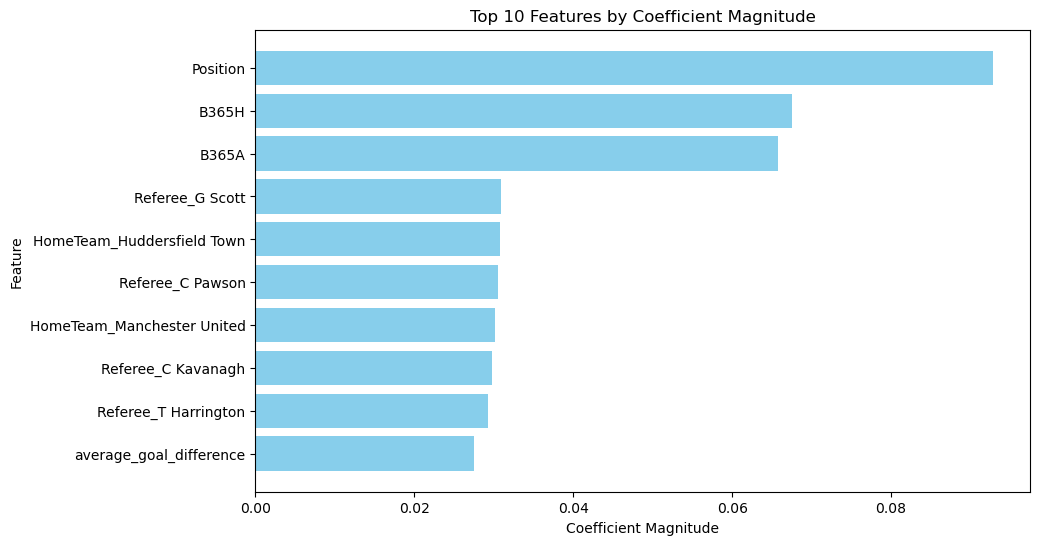

In [5]:
import matplotlib.pyplot as plt

# Get feature names
feature_names = X_train.columns

# Get absolute coefficients
absolute_coefficients = abs(best_logistic_model.coef_[0])

# Get indices of top 10 features
top_10_indices = absolute_coefficients.argsort()[-10:][::-1]

# Get top 10 feature names and coefficients
top_10_features = [feature_names[i] for i in top_10_indices]
top_10_coefficients = [absolute_coefficients[i] for i in top_10_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_coefficients, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Top 10 Features by Coefficient Magnitude')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest feature at the top
plt.show()


In [6]:
# Print the top 10 features and their coefficients
print("Top 10 Features by Coefficient Magnitude:")
for feature, coefficient in zip(top_10_features, top_10_coefficients):
    print(f"Feature: {feature}, Coefficient: {coefficient:.3f}")

Top 10 Features by Coefficient Magnitude:
Feature: Position, Coefficient: 0.093
Feature: B365H, Coefficient: 0.068
Feature: B365A, Coefficient: 0.066
Feature: Referee_G Scott, Coefficient: 0.031
Feature: HomeTeam_Huddersfield Town, Coefficient: 0.031
Feature: Referee_C Pawson, Coefficient: 0.031
Feature: HomeTeam_Manchester United, Coefficient: 0.030
Feature: Referee_C Kavanagh, Coefficient: 0.030
Feature: Referee_T Harrington, Coefficient: 0.029
Feature: average_goal_difference, Coefficient: 0.028


## Getting payouts 

In [29]:
main_df = pd.read_csv('/Users/merryxmm7/Documents/GitHub/Final_Project_Ironhack/Premier_league_predictor/clean_for_ml.csv')
main_df
df = main_df[['HomeTeam', 'B365H', 'AwayTeam', 'B365A', 'season', 'result']]
df['payout_home'] = df['B365H'] * 10 * df['result']
df_sorted = df.sort_values(by='season')
df

/var/folders/z5/cx4ddsg557q0lqzd5939yrkh0000gn/T/ipykernel_6409/169858556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payout_home'] = df['B365H'] * 10 * df['result']


,HomeTeam,B365H,AwayTeam,B365A,season,result,payout_home
0,AFC Bournemouth,1.90,Cardiff City,4.50,2018,1,19.0
1,Arsenal FC,4.00,Manchester City,1.95,2018,0,0.0
2,Fulham FC,2.50,Crystal Palace,3.00,2018,0,0.0
3,Huddersfield Town,6.50,Chelsea FC,1.61,2018,0,0.0
4,Liverpool FC,1.25,West Ham United,14.00,2018,1,12.5
...,...,...,...,...,...,...,...
2275,Crystal Palace,1.85,Aston Villa,3.60,2023,1,18.5
2276,Liverpool FC,1.17,Wolverhampton Wanderers,15.00,2023,1,11.7
2277,Luton Town,2.90,Fulham FC,2.20,2023,0,0.0
2278,Manchester City,1.08,West Ham United,21.00,2023,1,10.8


In [30]:
df = main_df[['HomeTeam', 'B365H', 'AwayTeam', 'B365A', 'season', 'result']].copy()
df['payout_home'] = df['B365H'] * 10 * df['result']
df_sorted = df.sort_values(by='season')
df_sorted.head(50)

,HomeTeam,B365H,AwayTeam,B365A,season,result,payout_home
0,AFC Bournemouth,1.90,Cardiff City,4.50,2018,1,19.0
1201,Arsenal FC,1.33,Fulham FC,9.50,2018,1,13.3
1202,Cardiff City,7.50,Tottenham Hotspur,1.50,2018,0,0.0
1203,Chelsea FC,1.28,Southampton FC,11.00,2018,0,0.0
1204,Everton FC,2.00,Leicester City,4.20,2018,0,0.0
1205,Huddersfield Town,2.14,Burnley FC,4.20,2018,0,0.0
1206,Manchester City,2.04,Liverpool FC,3.60,2018,1,20.4
1207,Newcastle United,6.00,Manchester United,1.61,2018,0,0.0
1208,West Ham United,1.95,Brighton & Hove Albion,4.00,2018,0,0.0
1209,Wolverhampton Wanderers,2.00,Crystal Palace,4.33,2018,0,0.0


In [31]:
teams = ['Arsenal FC', 'Chelsea FC', 'Manchester City', 'Manchester United', 'Liverpool FC', 'Tottenham Hotspur']
season = 2020

total_payout = {}

for team in teams:
    total_payout[team] = df_sorted[(df_sorted['HomeTeam'] == team) & (df_sorted['season'] == season)]['payout_home'].sum()

total_payout


{'Arsenal FC': 149.90000000000003,
 'Chelsea FC': 85.2,
 'Manchester City': 124.1,
 'Manchester United': 209.3,
 'Liverpool FC': 124.7,
 'Tottenham Hotspur': 83.6}

In [32]:
# Filter the DataFrame for the specific season and select necessary columns
season_df = main_df[(main_df['season'] == season) & (main_df['HomeTeam'].isin(teams))][['HomeTeam', 'result']].copy()

# Calculate total wins and losses for each team
team_stats = season_df.groupby('HomeTeam')['result'].value_counts().unstack(fill_value=0)

# Multiply wins and losses by 10
team_stats['well_spent'] = team_stats[1] * 10
team_stats['wasted'] = team_stats[0] * 10

# Reset index to make 'HomeTeam' a column again
team_stats = team_stats.reset_index()

# Rearrange columns for better readability
team_stats = team_stats[['HomeTeam', 'well_spent', 'wasted']]

# Display the resulting DataFrame
team_stats

result,HomeTeam,well_spent,wasted
0,Arsenal FC,60,130
1,Chelsea FC,60,130
2,Liverpool FC,70,120
3,Manchester City,100,90
4,Manchester United,120,70
5,Tottenham Hotspur,50,140


In [33]:
# Convert total_payout values to a list
total_payout_values = list(total_payout.values())

# Calculate total final payout
team_stats['total_final_payout'] = total_payout_values - team_stats['well_spent'] - team_stats['wasted']

# Display the resulting DataFrame
team_stats


result,HomeTeam,well_spent,wasted,total_final_payout
0,Arsenal FC,60,130,-40.1
1,Chelsea FC,60,130,-104.8
2,Liverpool FC,70,120,-65.9
3,Manchester City,100,90,19.3
4,Manchester United,120,70,-65.3
5,Tottenham Hotspur,50,140,-106.4


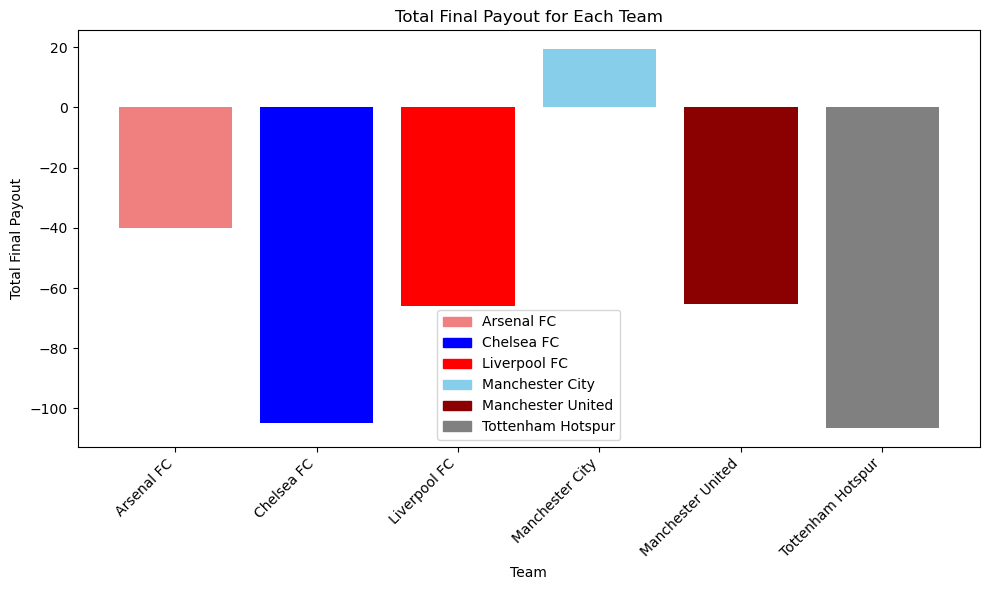

In [34]:
import matplotlib.pyplot as plt

# Define the colors for each team
team_colors = {
    'Arsenal FC': 'lightcoral',
    'Chelsea FC': 'blue',
    'Liverpool FC': 'red',
    'Manchester City': 'skyblue',
    'Manchester United': 'darkred',
    'Tottenham Hotspur': 'grey'
}

# Plotting the total final payout for each team
plt.figure(figsize=(10, 6))
bars = plt.bar(team_stats['HomeTeam'], team_stats['total_final_payout'], color=[team_colors[team] for team in team_stats['HomeTeam']])
plt.title('Total Final Payout for Each Team')
plt.xlabel('Team')
plt.ylabel('Total Final Payout')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add legend
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in team_colors.values()]
plt.legend(legend_handles, team_colors.keys())

plt.show()


In [37]:
# Define the teams and season
teams = ['Arsenal FC', 'Chelsea FC', 'Manchester City', 'Manchester United', 'Liverpool FC', 'Tottenham Hotspur']
season = 2020

# Filter the DataFrame for the specified teams, season, and B365H less than 1.50
filtered_df = df[(df['HomeTeam'].isin(teams)) & (df['season'] == season) & (df['B365H'] < 1.50)]

# Calculate the new payout
filtered_df['new_payout'] = 10 * filtered_df['B365H']*filtered_df["result"]

# Display the resulting DataFrame
filtered_df


/var/folders/z5/cx4ddsg557q0lqzd5939yrkh0000gn/T/ipykernel_6409/2217013665.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['new_payout'] = 10 * filtered_df['B365H']*filtered_df["result"]


,HomeTeam,B365H,AwayTeam,B365A,season,result,payout_home,new_payout
24,Liverpool FC,1.28,Leeds United,9.50,2020,1,12.8,12.8
86,Manchester United,1.30,Crystal Palace,9.50,2020,1,13.0,13.0
144,Liverpool FC,1.45,Arsenal FC,6.50,2020,1,14.5,14.5
145,Manchester City,1.28,Leicester City,9.50,2020,0,0.0,0.0
147,Tottenham Hotspur,1.45,Newcastle United,7.00,2020,0,0.0,0.0
202,Chelsea FC,1.40,Crystal Palace,8.00,2020,1,14.0,14.0
260,Chelsea FC,1.45,Southampton FC,6.50,2020,0,0.0,0.0
265,Manchester City,1.44,Arsenal FC,6.50,2020,1,14.4,14.4
325,Liverpool FC,1.22,Sheffield United,12.00,2020,0,0.0,0.0
384,Liverpool FC,1.36,West Ham United,7.50,2020,0,0.0,0.0


In [38]:
# Calculate the total new payout for each team
total_new_payout = filtered_df.groupby('HomeTeam')['new_payout'].sum().reset_index()

# Display the resulting DataFrame
total_new_payout


,HomeTeam,new_payout
0,Arsenal FC,28.4
1,Chelsea FC,53.9
2,Liverpool FC,38.7
3,Manchester City,124.1
4,Manchester United,78.9
5,Tottenham Hotspur,12.5


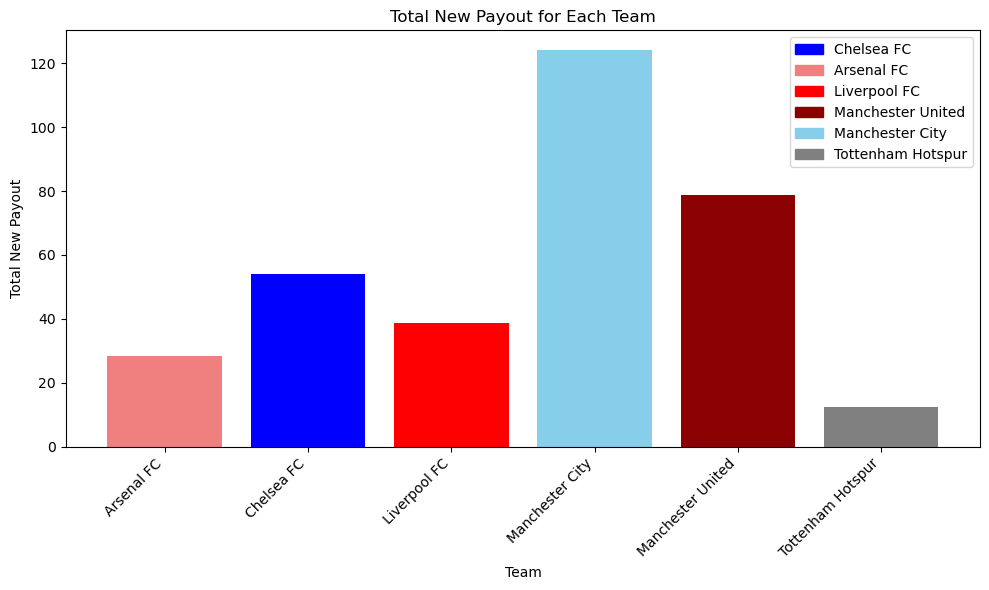

In [39]:
import matplotlib.pyplot as plt

# Define colors for each team
team_colors = {
    'Chelsea FC': 'blue',
    'Arsenal FC': 'lightcoral',
    'Liverpool FC': 'red',
    'Manchester United': 'darkred',
    'Manchester City': 'skyblue',
    'Tottenham Hotspur': 'grey'
}

# Plot the total new payout for each team
plt.figure(figsize=(10, 6))
bars = plt.bar(total_new_payout['HomeTeam'], total_new_payout['new_payout'], color=[team_colors[team] for team in total_new_payout['HomeTeam']])
plt.title('Total New Payout for Each Team')
plt.xlabel('Team')
plt.ylabel('Total New Payout')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add legend
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in team_colors.values()]
plt.legend(legend_handles, team_colors.keys())

plt.show()
